In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math
import cvxpy as cp

from decentr_compressed_sensing import *

In [2]:
# random seed
np.random.seed(108)

# data generation
problem_spec = {}
problem_spec['n_sensor_per_node'] = 13
problem_spec['n_node'] = 6
problem_spec['n_sensor'] = problem_spec['n_sensor_per_node'] * problem_spec['n_node']
problem_spec['vector_size'] = 100
problem_spec['n_nonzero_entry'] = int(np.ceil(0.2 * problem_spec['vector_size']))
print(problem_spec)
problem_data = data_generation(problem_spec)
network_data = graph_generation_nodes6()

problem_data['rho'] = 0.01

# PG-EXTRA hyperparameters
problem_data['alpha'] = 2.5
problem_data['itr_num'] = 1000

{'n_sensor_per_node': 13, 'n_node': 6, 'n_sensor': 78, 'vector_size': 100, 'n_nonzero_entry': 20}


In [3]:
lmbd_min = np.linalg.eigvalsh(network_data['W']).min()
print(f"lambda_min(W) = {lmbd_min}")
n_sensor_per_node = problem_spec['n_sensor_per_node']
lmbds = []
for jj in range(problem_spec['n_node']) :
    A_temp = problem_data['A'][jj*n_sensor_per_node : (jj+1)*n_sensor_per_node]
    lmbds += [np.linalg.eigvalsh(A_temp.T @ A_temp).max()]
print(f"L_max = {max(lmbds)}")
print(f"{(1 + lmbd_min) / max(lmbds)=}")

lambda_min(W) = -0.0822580400531801
L_max = 0.14239495013689374
(1 + lmbd_min) / max(lmbds)=6.4450456920314485


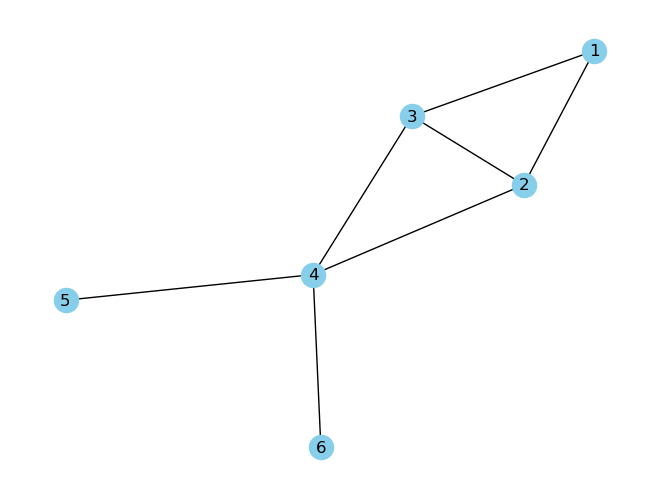

In [4]:
nx.draw(network_data["G"], node_color='skyblue', with_labels=True)
# plt.savefig("plots/graph_n6.pdf")

In [5]:
# obtain true solution to L1-regularized optimization problem
x_opt_star, f_star = obtain_opt_prob_solution(problem_spec, problem_data, network_data)

In [6]:
f_cvx, x_cvx = cvx_compressed_sensing(problem_spec, problem_data)

f_star, x_opt_star = f_cvx, x_cvx
print(f"{f_star=}")

f_star=0.481497276117218


In [7]:
# assert np.allclose(f_cvx, f_star) and np.linalg.norm(x_cvx - x_opt_star, ord='fro') < 1e-8, print(f_cvx, f_star)

In [8]:
params={"R":18, "Inductance":10, "L_extra":15, "h":0.47240544313814353}
dadmm_l_err_opt_star, dadmm_l_err_opt_reldiff, dadmm_l_const_vio, dadmm_l_f_reldiff = dadmm("cir_dadmm_l", problem_spec, problem_data, 
                                                                                network_data, x_opt_star, f_star, 
                                                                                params=params, printing=True)

ii=0, f_reldiff[-1]=0.09014586100071627, err_opt_reldiff[-1]=0.96488904706484, 0.8328160217623881
ii=50, f_reldiff[-1]=0.00032972541206475033, err_opt_reldiff[-1]=0.07872386518652098, 2.540208654639384
ii=100, f_reldiff[-1]=8.002211450806572e-06, err_opt_reldiff[-1]=0.010031622353314075, 2.6579199059450973
ii=150, f_reldiff[-1]=2.099329169624915e-06, err_opt_reldiff[-1]=0.0013152141704167169, 2.671078436974564
ii=200, f_reldiff[-1]=1.4342754184762614e-06, err_opt_reldiff[-1]=0.00017333953768987245, 2.6727377775393593
ii=250, f_reldiff[-1]=2.0228325024699072e-08, err_opt_reldiff[-1]=2.286081215420642e-05, 2.672951867972324
ii=300, f_reldiff[-1]=1.0765892305108979e-08, err_opt_reldiff[-1]=3.0411045025683024e-06, 2.6729799292281227
ii=350, f_reldiff[-1]=1.3717972544069048e-10, err_opt_reldiff[-1]=4.002855806260149e-07, 2.6729835503712387
ii=400, f_reldiff[-1]=1.7796526138035807e-11, err_opt_reldiff[-1]=5.2191584678907014e-08, 2.6729840510398093
ii=450, f_reldiff[-1]=2.0452199247805863e-12

In [9]:
R = 10
admm_err_opt_star, admm_err_opt_reldiff, admm_const_vio, admm_f_reldiff = dadmm("dadmm", problem_spec, problem_data, 
                                                                                network_data, x_opt_star, f_star, 
                                                                                params={"R":R}, printing=True)

ii=0, f_reldiff[-1]=0.04312681633959755, err_opt_reldiff[-1]=0.9657159665926579, 0.5735171655363902
ii=50, f_reldiff[-1]=0.0017896373399219022, err_opt_reldiff[-1]=0.19424800876007095, 2.2924671426089267
ii=100, f_reldiff[-1]=0.00015355350771026314, err_opt_reldiff[-1]=0.058183408354625925, 2.577591614426776
ii=150, f_reldiff[-1]=1.7711020869695593e-05, err_opt_reldiff[-1]=0.018468234495144297, 2.644724388174511
ii=200, f_reldiff[-1]=6.66952748213258e-06, err_opt_reldiff[-1]=0.005937890387874682, 2.6642048939836727
ii=250, f_reldiff[-1]=4.32866780954999e-06, err_opt_reldiff[-1]=0.0019170379789328555, 2.670204716303343
ii=300, f_reldiff[-1]=1.0181097945484583e-06, err_opt_reldiff[-1]=0.0006193610426940403, 2.6720970854134123
ii=350, f_reldiff[-1]=8.549163430930764e-08, err_opt_reldiff[-1]=0.00020017830558522444, 2.672698639651963
ii=400, f_reldiff[-1]=3.548084717614645e-08, err_opt_reldiff[-1]=6.473993143349727e-05, 2.672892480859095
ii=450, f_reldiff[-1]=7.000080737484563e-09, err_opt_

In [10]:
params={"R":18, "Inductance":10, "h":1.1054814693822324}
ciradmm_err_opt_star, ciradmm_err_opt_reldiff, ciradmm_const_vio, ciradmm_f_reldiff = dadmm("cir_dadmm", problem_spec, problem_data, 
                                                                                network_data, x_opt_star, f_star, 
                                                                                params=params, printing=True)

ii=0, f_reldiff[-1]=0.09014586100071627, err_opt_reldiff[-1]=0.96488904706484, 0.8328160217623881
ii=50, f_reldiff[-1]=0.00025934149547060195, err_opt_reldiff[-1]=0.07485966017834707, 2.546836949780835
ii=100, f_reldiff[-1]=9.18714142858103e-06, err_opt_reldiff[-1]=0.00965979411360191, 2.658500357993761
ii=150, f_reldiff[-1]=2.840109256996793e-06, err_opt_reldiff[-1]=0.0012811524944917202, 2.6711392268918983
ii=200, f_reldiff[-1]=2.3282506815751837e-08, err_opt_reldiff[-1]=0.0001699898758425941, 2.6727424759098053
ii=250, f_reldiff[-1]=2.9390339493812626e-09, err_opt_reldiff[-1]=2.2501706656752062e-05, 2.6729522138485597
ii=300, f_reldiff[-1]=2.57254425820506e-10, err_opt_reldiff[-1]=2.9582785203029114e-06, 2.6729799884888066
ii=350, f_reldiff[-1]=3.2699342775168836e-10, err_opt_reldiff[-1]=3.7238907429483003e-07, 2.6729836380186507
ii=400, f_reldiff[-1]=4.411172759974904e-12, err_opt_reldiff[-1]=4.9035373877972406e-08, 2.672984060513325
ii=450, f_reldiff[-1]=6.577215147053689e-13, err

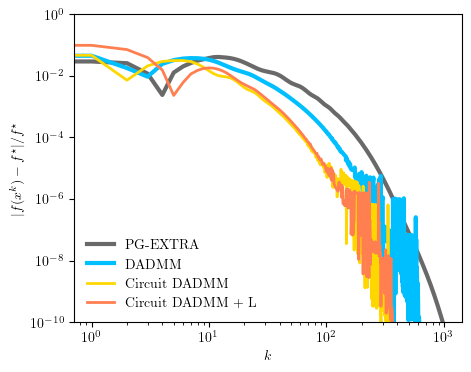

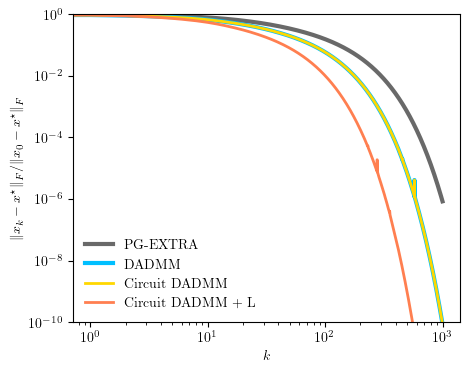

In [11]:
# apply PG-EXTRA 
pg_op_norm, pg_err_opt_star, pg_err_opt_reldiff, pg_const_vio, pg_f_reldiff = pg_extra(None, problem_spec, problem_data, network_data, x_cvx, f_star,)

fname = "n6_circuit_dadmm"
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams["legend.fontsize"] = 10
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["lines.markersize"] = 4
plt.rcParams["legend.framealpha"] = 0.0
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10
plt.rcParams["mathtext.fontset"] = 'cm' # default = 'dejavusans', other options = 'cm', 'stixsans', 'dejavuserif'
black, red, blue, green = 'dimgrey', 'coral', 'deepskyblue', 'gold'

# operator norm plot (log-log plot)
plt.figure(figsize=(5,4))
plt.minorticks_off()
plt.xscale("log")
plt.yscale("log")
plt.plot(pg_f_reldiff, label='PG-EXTRA', color=black, linewidth=3)
plt.plot(admm_f_reldiff, label='DADMM', color=blue, linewidth=3)
plt.plot(ciradmm_f_reldiff, label='Circuit DADMM',  color=green, linewidth=2)
plt.plot(dadmm_l_f_reldiff, label='Circuit DADMM + L',  color=red, linewidth=2)
plt.xlabel(r"$k$")
plt.ylabel(r"$|f(x^k) - f^\star|/f^\star$")
# plt.ylabel(r"$\|\tilde{\mathbf{A}}x_k\|^2_M$")
plt.ylim(1e-10, 1e0)
plt.legend()
plt.savefig(f'plots/freldif_{fname}.pdf', dpi=300)

plt.figure(figsize=(5,4))
plt.minorticks_off()
plt.xscale("log")
plt.yscale("log")
plt.plot(pg_err_opt_reldiff, label='PG-EXTRA', color=black, linewidth=3)
plt.plot(admm_err_opt_reldiff, label='DADMM', color=blue, linewidth=3)
plt.plot(admm_err_opt_reldiff, label='Circuit DADMM', color=green, linewidth=2)
plt.plot(dadmm_l_err_opt_reldiff, label='Circuit DADMM + L', color=red, linewidth=2)
plt.xlabel(r"$k$")
plt.ylabel(r"$\|x_k - x^\star\|_F /\|x_0 - x^\star\|_F $")
plt.ylim(1e-10, 1e0)
plt.legend()
plt.savefig(f'plots/xreldif_{fname}.pdf', dpi=300)